In [91]:
import pandas as pd
import os

In [92]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기b

In [93]:
os.getcwd()

'c:\\promise\\titanic'

In [94]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId : 탑승객의 고유 아이디
Survival : 생존여부(0: 사망, 1: 생존)
Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
Name : 이름
Sex : 성별
Age : 나이
Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
Parch: 함께 탑승한 부모, 자식의 수
Ticket: 티켓번호
Fare: 티켓의 요금
Cabin: 객실번호
Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [96]:
train.shape, test.shape, submission.shape

((891, 12), (418, 11), (418, 2))

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

기술통계량이란?

해당 column을 대표할 수 있는 통계값들을 의미
기술통계량 종류
count: 해당 column에서 비어 있지 않은 값의 개수
mean: 평균
std: 표준편차
min: 최솟값 (이상치 포함)
25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
max: 최댓값 (이상치 포함)
이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR
위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR
IQRIQR = Q_3 - Q_1Q3​−Q1​

In [98]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [100]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [102]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [103]:
%%time
train[['Pclass', 'Fare']].groupby('Pclass').mean()

Wall time: 2.99 ms


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


<AxesSubplot:xlabel='Pclass'>

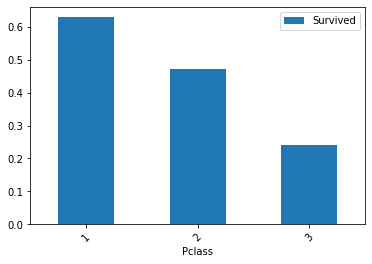

In [104]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind ='bar', rot=45)

In [105]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

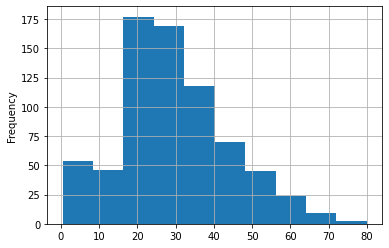

In [106]:
train['Age'].plot(kind='hist', bins=10, grid=True)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

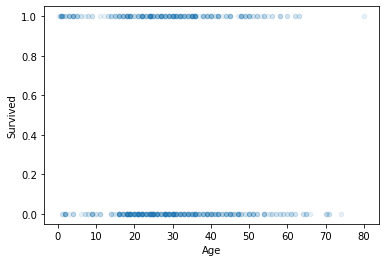

In [107]:
train.plot('Age', 'Survived', kind = 'scatter', alpha = 0.1)

데이터 전처리

In [108]:
train.isna().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [109]:
train['Age'].mean()

29.69911764705882

In [110]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [111]:
train['Age']=train['Age'].fillna(value =train['Age'].mean())


In [112]:
train['Age'].isna().sum()


0

In [113]:
train['Embarked'].fillna(value='S', inplace= True)


In [114]:
train['Embarked'].isna().sum()

0

In [115]:
train['Embarked'].isna().sum()

0

In [116]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [117]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [118]:
test['Age']=test['Age'].fillna(value =train['Age'].mean())

<AxesSubplot:ylabel='Frequency'>

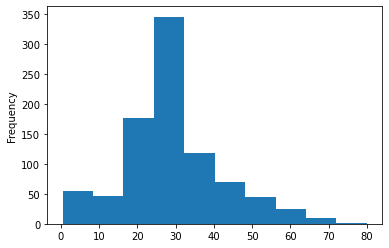

In [119]:
train['Age'].plot(kind= 'hist')

In [120]:
train['Sex']= train['Sex'].map({'male':0, 'female':1})

In [121]:
test['Sex']= test['Sex'].map({'male':0, 'female':1})

변수선택 및 모델 구축

In [122]:
X_train =train[['Pclass', 'Age']]
y_train =train['Survived']
X_test= test[['Pclass', 'Age']]


In [123]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [124]:
model.fit(X_train, y_train)

LogisticRegression()

In [125]:
y_pred = model.predict(X_test)


In [126]:
submission['Survived']=y_pred

In [127]:
submission.to_csv('lr_model_Pclass_Age.csv', index = False)

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [129]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [130]:
submission['Survived']=dt_model.predict(X_test)

In [131]:
submission.to_csv('dt_model.csv', index=False)

5. 모델 학습 및 검증

In [132]:
submission['Survived']=model.predict_proba(X_test)[:,1]


In [133]:
submission.to_csv('lr_proba.csv', index = False)

In [134]:
submission['Survived'] = dt_model.predict_proba(X_test)[:,1]

In [135]:
submission.to_csv('dt_proba.csv', index = False)

In [136]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [137]:
dt_model_new = DecisionTreeClassifier(min_samples_split=10)
dt_model_new.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [138]:
submission['Survived']= dt_model_new.predict_proba(X_test)[:,1]


In [139]:
submission.to_csv('dt_min_samples_10_proba.csv', index = False)

In [140]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [141]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [142]:
X_train=train[['Pclass','Age']]
y_train=train['Survived']
X_test=test[['Pclass', 'Age']]


In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [146]:
y_true=y_train.values

In [147]:
cf_matrix=confusion_matrix(y_true, y_pred)

In [148]:
cf_matrix

array([[466,  83],
       [182, 160]], dtype=int64)

In [149]:
accuracy_score(y_true, y_pred)

0.7025813692480359

In [150]:
(cf_matrix[0,0] + cf_matrix[1,1]) / 891

0.7025813692480359

In [151]:
precision_score(y_true, y_pred)

0.6584362139917695

In [152]:
(cf_matrix[1,1]) / (83 + 160)

0.6584362139917695

In [154]:
recall_score(y_true, y_pred)

0.4678362573099415

In [155]:
(cf_matrix[1,1]) / (182 + 160)

0.4678362573099415

In [156]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       549
           1       0.66      0.47      0.55       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.70      0.70      0.69       891



In [157]:
roc_auc_score(y_true, y_pred)

0.6583261432269197

In [ ]:
결과

In [158]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [159]:
train= pd.read_csv('train.csv')# 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 시험지 파일
submission = pd.read_csv('submission.csv') #답안지 파일 

In [160]:
model_10= DecisionTreeClassifier(min_samples_split=10)
model_20= DecisionTreeClassifier(min_samples_split=20)
model_30= DecisionTreeClassifier(min_samples_split=30)

In [161]:
kfold= KFold(n_splits=5, shuffle=True, random_state=10)

In [162]:
train['Age']= train['Age'].fillna(value =train['Age'].mean())
test['Age']= test['Age'].fillna(value =test['Age'].mean())

In [163]:
X_train=train[['Pclass', 'Age']]
y_train=train['Survived']


In [165]:
score_10= []

for trn_idx, val_idx in kfold.split(X_train):

    X_trn, y_trn =X_train.iloc[trn_idx,:], y_train.iloc[trn_idx]
    X_val, y_val =X_train.iloc[val_idx,:], y_train.iloc[val_idx]

    model_10.fit(X_trn, y_trn)

    y_pred= model_10.predict_proba(X_val)[:,1]

    print('예측끝')

    score_10.append(roc_auc_score(y_val.values, y_pred))

예측끝
예측끝
예측끝
예측끝
예측끝


In [166]:
score_10

[0.6663909567135373,
 0.6935200216450217,
 0.6567085953878408,
 0.5899470899470899,
 0.7008647798742138]

In [168]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측끝')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))

예측끝
예측끝
예측끝
예측끝
예측끝


In [171]:
score_20

[0.6747311827956988,
 0.697443181818182,
 0.658149895178197,
 0.5986111111111111,
 0.6964098532494759]

In [172]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 끝')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))

예측 끝
예측 끝
예측 끝
예측 끝
예측 끝


In [173]:
score_30

[0.7031982354562999,
 0.713474025974026,
 0.6565120545073374,
 0.6110449735449734,
 0.7037473794549267]

In [175]:
import numpy as np
np.mean(score_10), np.mean(score_20),np.mean(score_30)

(0.6614862887135406, 0.665069044830533, 0.6775953337875128)